In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import data_exploration as de
import data_cleanup as dc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import domain_comparison as doc

C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
aa = pd.read_csv('../DMS_data/aminoacids.csv')

df: pd.DataFrame = dc.norm(pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'))
norm_frame = dc.aufteilung_mut_pos(dc.norm(df))

In [3]:
# Saving the different domains for better accessibility

#Transactivation Domain 1
t1_start = 1
t1_end = 43

#Transactivation Domain 2
t2_start = 44
t2_end = 63

#Proline-rich Region
pr_start = 64
pr_end = 92

#DNA Binding Domain
dna_start = 102
dna_end = 292

#Tetramerization Domain
tetra_start = 320
tetra_end = 355

#Regulatory Domain
reg_start = 356
reg_end = 393



t1_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t1_start, end= t1_end)))
t1_list = doc.slice_domain(df, start= t1_start, end= t1_end)
t1_dist = de.dms_distance_matrix(t1_list)

t2_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t2_start, end= t2_end)))
t2_list = doc.slice_domain(df, start= t2_start, end= t2_end)
t2_dist = de.dms_distance_matrix(t2_list)

pr_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= pr_start, end= pr_end)))
pr_list = doc.slice_domain(df, start= pr_start, end= pr_end)
pr_dist = de.dms_distance_matrix(pr_list)

dna_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= dna_start, end= dna_end)))
dna_list = doc.slice_domain(df, start= dna_start, end= dna_end)
dna_dist = de.dms_distance_matrix(dna_list)

tetra_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= tetra_start, end= tetra_end)))
tetra_list = doc.slice_domain(df, start= tetra_start, end= tetra_end)
tetra_dist = de.dms_distance_matrix(tetra_list)

reg_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= reg_start, end= reg_end)))
reg_list = doc.slice_domain(df, start= reg_start, end= reg_end)
reg_dist = de.dms_distance_matrix(reg_list)

# to be more efficient for greater amounts of domains: Transfer into a dictionary
#OUTLOOK: generate ideal amount of clusters directly from the data, but in more accurate fashion. This way, it is definitely not optimal...


In [4]:
t2_dist.shape
## WORK FOR YOU FRIDO: Warum ist hier nicht 20 x 20? Müsste doch bei einer Distanzmatrix so sein... Sonst sind es nicht genug Datenpunkte
#Bei der DNA Domäne passt es, bei der pr_dist sind es 9x9, bei t2 sinds 13x13...

(13, 13)

In [5]:
### EDIT ###

#Variable to create plots on
domain = dna_dist
#Variable to print correct plot titles, "domain" after each word is already implemented
title = "DNA-binding"


C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


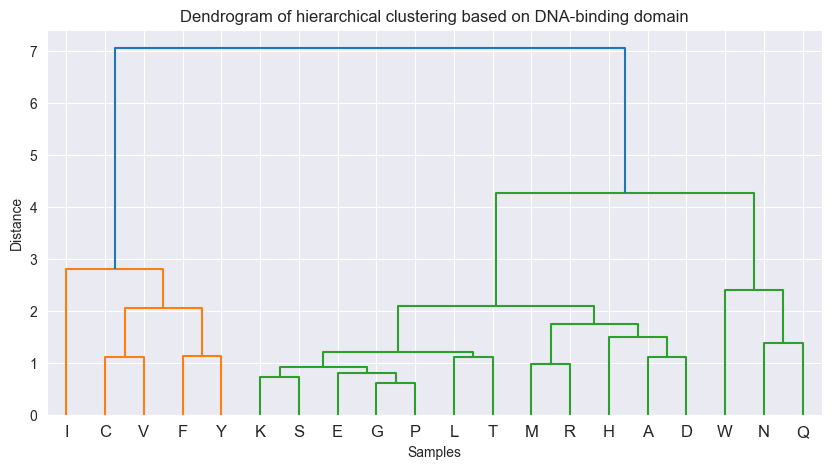

In [6]:
## HIERARCHISCHES CLUSTERN
hc = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hc.fit(domain)


# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title(f'Dendrogram of hierarchical clustering based on {title} domain')
de.plot_dendrogram(hc, labels=domain.index)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [9]:
best_clusters = de.determine_clusters_silhouette(domain)
print(best_clusters)

2


C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matri

C:\Users\ennow\AppData\Local\Temp\ipykernel_23096\3115859612.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(domain, method='ward')


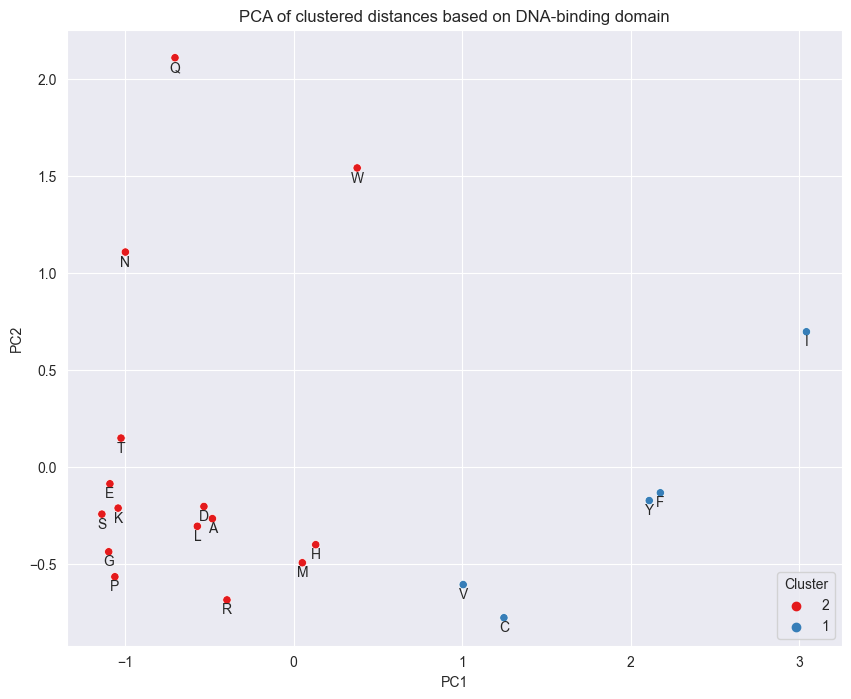

In [8]:
# Perform hierarchical clustering
hc = linkage(domain, method='ward')

# Determine the cluster labels
num_clusters = best_clusters #if needed: change wanted clusters manually
cluster_labels = fcluster(hc, num_clusters, criterion='maxclust')

# Transform the data to the first two principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(domain)

# Create a DataFrame with the PCA data and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels.astype(str)
pca_df['Label'] = domain.index

# Plot the PCA results with cluster information using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')

# Annotate the plot with labels
for i, point in pca_df.iterrows():
    plt.annotate(point['Label'], (point['PC1'], point['PC2']), textcoords="offset points", xytext=(0, -10), ha='center')

# Set plot title and labels
plt.title(f'PCA of clustered distances based on {title} domain')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Move the legend to the lower right corner
plt.legend(title='Cluster', bbox_to_anchor=(1, 0), loc='lower right')

# Show the plot
plt.show()